# **Used Cars Price Prediction**

### **Loading libraries**

In [82]:
# Import libraries for reading, visualising and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Let us load the data**

In [84]:
data = pd.read_csv("/content/drive/MyDrive/used_cars.csv")

# Copy the data in a new variable
df = data.copy()

## Data Overview

In [85]:
# View first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [86]:
# View last 5 rows
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [87]:
# Check the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [88]:
# Check total number of missing values of each column
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


<b> Observations: </b>

The S.No. column contains no null values, and the number of unique values matches the total number of observations. This suggests that S.No. serves as an index for data entries rather than a meaningful feature for analysis. Since it does not contribute to predictive power, it can be dropped from the dataset.

In [89]:
# Remove 'S.No.' column from data
df.drop('S.No.',axis=1,inplace=True)

## **Exploratory Data Analysis**

In [90]:
# Explore basic summary statistics of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


In [91]:
# Explore basic summary statistics of categorical variables
df.describe(include='object').T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


In [92]:
# Number of unique observations in each category
categorical_columns = df.select_dtypes(include = ['object']).columns

for column in categorical_columns:
    print("For column:", column)
    print(df[column].value_counts())
    print('-'*50)

For column: Name
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric 

<b>Observations: </b>
- The `kilometers_driven` feature contains extreme values. Analysing the manufacturing year of cars with extreme `kilometers_driven` values could help determine if older vehicles are responsible for these outliers.

- Some entries in the `mileage` feature have a value of zero. Since a car cannot realistically have zero mileage, these values might indicate missing or incorrect data that require further investigation.

In [93]:
# Check Kilometers_Driven extreme values
df.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


<b> Observation: </b>
- The first row contains a car manufactured in 2017 with kilometers_driven recorded as 6,500,000 km. This is highly unrealistic. This is likely a data entry error. Since such an extreme value can distort analysis, removing this entry from the dataset would be a reasonable step.

In [94]:
# Removing the 'row' at index 2328 from the data
df.drop(2328, axis=0, inplace=True)

In [95]:
# Check Mileage extreme values (zero)
df.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


<b> Observation: </b>
- The mileage feature contains entries with a value of zero, which is not realistic for a car.
- These zero values should be treated as missing data. We will handle them appropriately during the Feature Engineering stage to ensure data quality.

## **Univariate Analysis**

In [96]:
# Function that plots a boxplot and a histogram along the same scale for all numerical values
def histogram_boxplot(feature):
  fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': (1,3)}, figsize=(12,5))
  sns.boxplot(data=df, x=feature, showmeans= True, color='pink', ax=ax[0])
  sns.histplot(data=df, x=feature, kde=True, ax=ax[1])
  ax[1].axvline(df[feature].mean(), color='green', linestyle='--')
  ax[1].axvline(df[feature].median(), color='red', linestyle='-.')

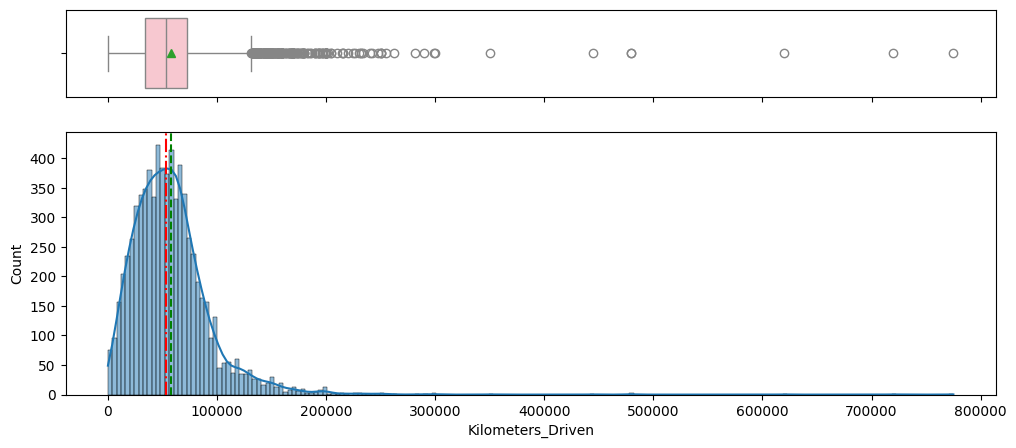

In [97]:
# Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any
histogram_boxplot('Kilometers_Driven')

<b> Observations: </b>
- The feature is highly right-skewed with extreme outliers.
- Skewness can distort statistical analysis and bias models that assume normality.
- Log transformation can reduce skewness, improving model performance.
- Ensure no zero/negative values before applying the transformation.

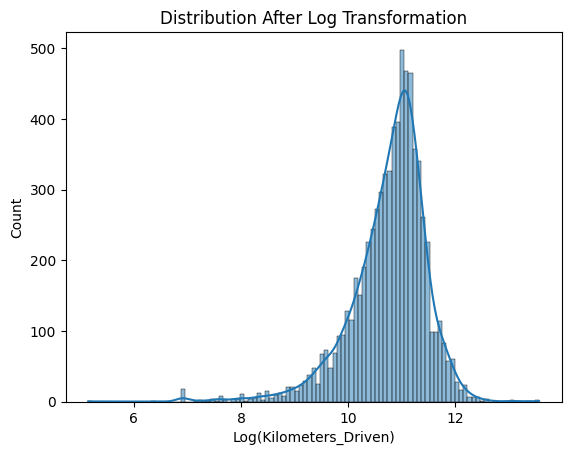

In [98]:
# Plot the transformed distribution
sns.histplot(np.log1p(df["Kilometers_Driven"]), kde=True)
plt.xlabel("Log(Kilometers_Driven)")
plt.title("Distribution After Log Transformation")
plt.show()

In [99]:
# Add a transformed kilometers_driven feature in data
df["Log_Kilometers_Driven"] = np.log1p(df["Kilometers_Driven"])

<b> Observations: </b>
- 'Kilometers_Driven' was highly skewed, and log transformation helped normalise its distribution.
- This transformation makes the distribution more symmetrical, improving model interpretability and performance.

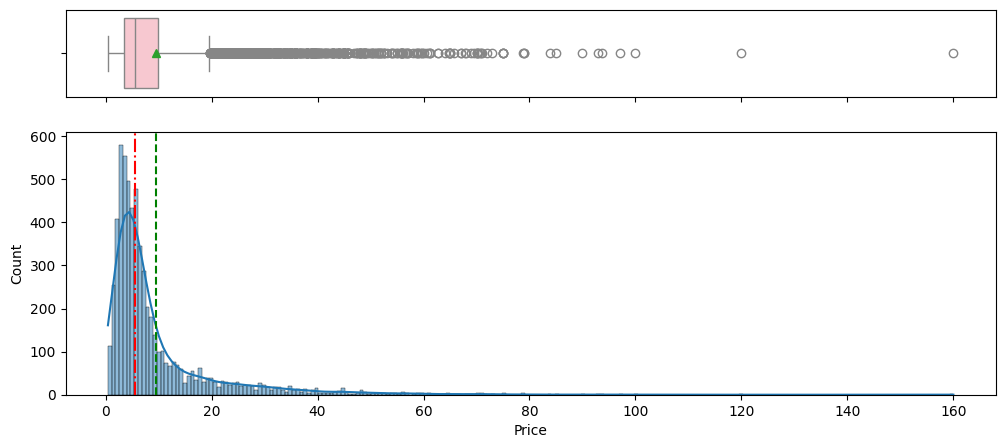

In [100]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot('Price')

<b> Observations: </b>
- 'Price' is also highly skewed. Applying log transformation can help reduce skewness.
- We should add the transformed variable as 'Log_Price' to the dataset for better model performance.

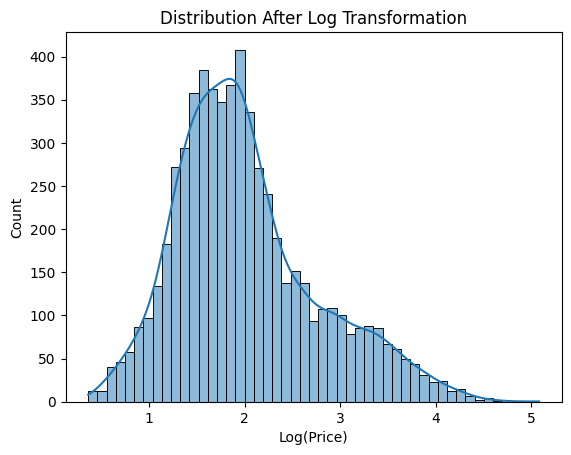

In [101]:
# Log transformation of the feature 'Price'
sns.histplot(np.log1p(df["Price"]), kde=True)
plt.xlabel("Log(Price)")
plt.title("Distribution After Log Transformation")
plt.show()

In [102]:
# Add a transformed Price feature in data
df["Log_Price"] = np.log1p(df["Price"])

## **Bivariate Analysis**

### **Feature Engineering**

### **Missing value treatment**

## **Important Insights from EDA and Data Preprocessing**


## **Building Various Models**

### **Split the Data**

### **Hyperparameter Tuning: Decision Tree**

**Feature Importance**

### **Hyperparameter Tuning: Random Forest**

**Feature Importance**

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

**2. Refined insights:**

**3. Proposal for the final solution design:**